# Importing all libraries

In [50]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import copy
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# EXPLORING THE DATA SET

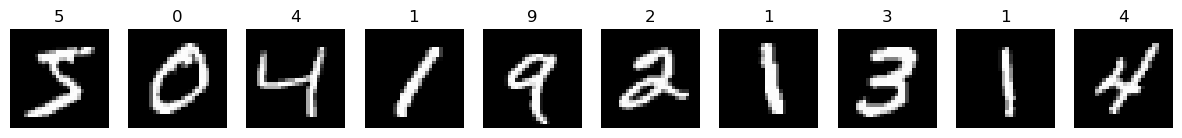

In [51]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(y_train[i]))

plt.show()

# Setting a batch size

In [52]:
numb_batch = 64

# Getting The Data

In [53]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

# CREATING THE MODEL

In [54]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

# Validating the model

In [55]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

# Training Function

In [56]:
def train(model, train_dl, val_dl, numb_epoch=3, lr=1e-3):
    accuracies = []
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            optimizer.zero_grad()
            pred = model(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(model, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(model)
            max_accuracy = accuracy
            print("Best Model Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy:", accuracy, '%')
    plt.plot(accuracies)
    return best_model

In [57]:
lenet = create_lenet()

In [ ]:
 Post this point i was not able to complete my code using Pytorch, because of issues in torch not being compiled with CUDA 
    enabled. I was not able to resolve this and thus implemented a NN suing tensorflow. 

# USING TENSORFLOW

In [69]:
X_train = X_train / 255
X_test = X_test / 255
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [70]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2266 - accuracy: 0.7146
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5210 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4019 - accuracy: 0.8908
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3541 - accuracy: 0.9009
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3279 - accuracy: 0.9071


In [71]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 986us/step - loss: 0.3092 - accuracy: 0.9124


[0.3091907501220703, 0.9124000072479248]

In [72]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    4,    1,    0,    5,    7,    1,    2,    0],
       [   0, 1107,    1,    3,    0,    1,    4,    2,   17,    0],
       [  12,    7,  903,   20,   12,    2,   16,   15,   41,    4],
       [   2,    1,   18,  914,    0,   29,    2,   23,   16,    5],
       [   2,    4,    5,    1,  903,    2,   13,    2,    4,   46],
       [  11,    3,    7,   43,    7,  762,   15,   12,   25,    7],
       [  18,    3,    6,    1,    8,   17,  900,    3,    2,    0],
       [   3,    8,   20,    6,    5,    0,    0,  954,    3,   29],
       [  12,    6,   10,   28,    9,   35,   14,   17,  831,   12],
       [  15,    7,    2,   12,   30,    9,    0,   41,    3,  890]])>

Text(95.72222222222221, 0.5, 'Truth')

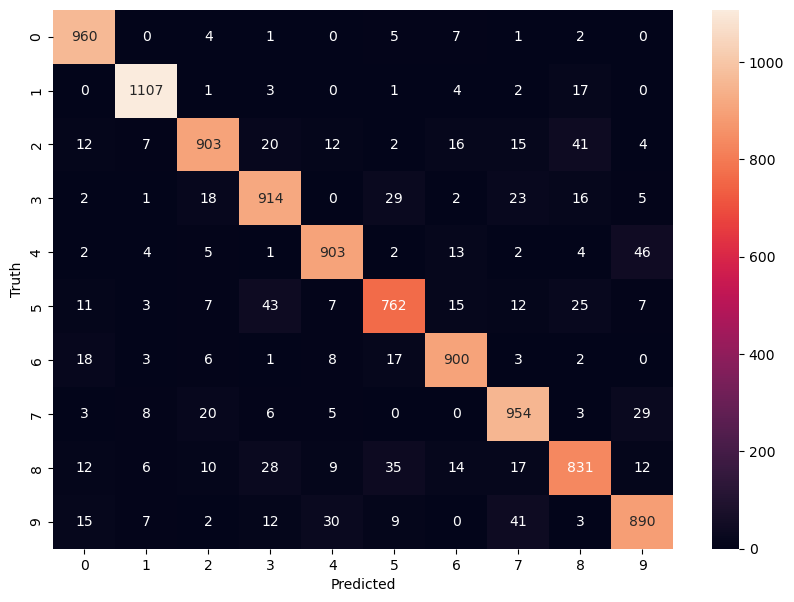

In [73]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2913 - accuracy: 0.6809
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5497 - accuracy: 0.8607
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4165 - accuracy: 0.8881
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8988
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.9047
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9125
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9154
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2848 - accuracy: 0.9177
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.277

In [75]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2705 - accuracy: 0.9220


[0.27053219079971313, 0.921999990940094]

313/313 [==============================] - 0s 991us/step


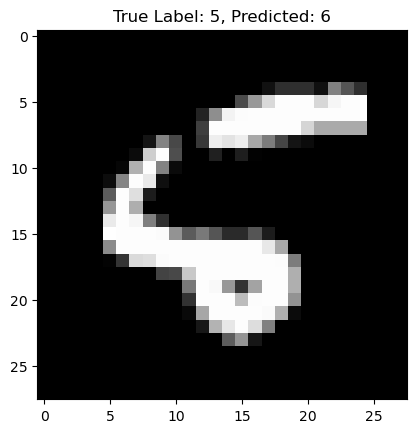

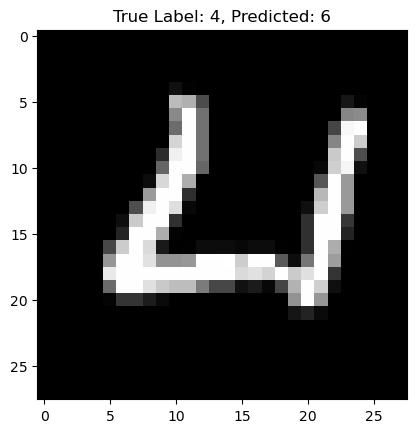

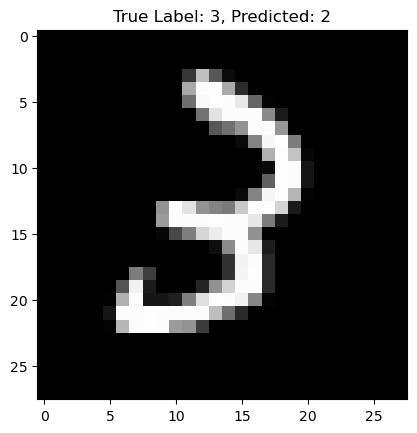

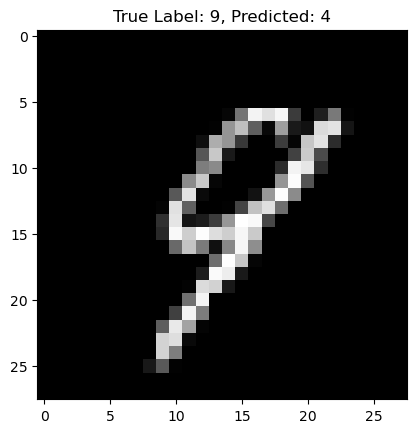

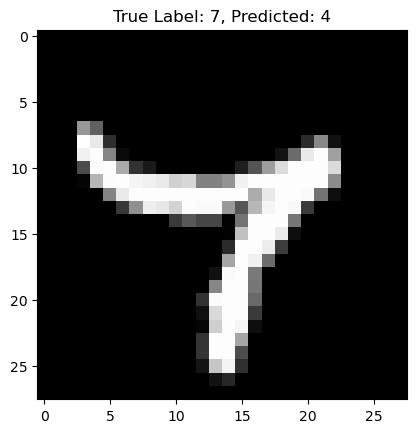

In [76]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert one-hot encoded labels to integers (if needed)
predicted_labels = np.argmax(predictions, axis=1)

# Identify misclassified indices
misclassified_indices = np.where(predicted_labels != y_test)[0]

# Visualize some misclassified images
num_samples_to_visualize = 5
for i in range(min(num_samples_to_visualize, len(misclassified_indices))):
    index = misclassified_indices[i]

    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {y_test[index]}, Predicted: {predicted_labels[index]}')
    plt.show()